In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

Data loading

In [2]:
laptops=pd.read_csv('laptops.csv')
laptops.head()

,Unnamed: 0,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,warranty
0,0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,"₹60,490",70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
1,1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,"₹33,470",61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
2,2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,"₹76,890",66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,"₹34,990",54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
4,4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,"₹22,990",54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty


In [3]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1712 non-null   int64  
 1   name           1712 non-null   object 
 2   price          1712 non-null   object 
 3   rating         1696 non-null   float64
 4   processor      1711 non-null   object 
 5   cpu_core       1711 non-null   object 
 6   ram            1711 non-null   object 
 7   ssd            1711 non-null   object 
 8   gpu            1711 non-null   object 
 9   display        1709 non-null   object 
 10  operating_sys  1708 non-null   object 
 11  warranty       1698 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 160.6+ KB


DATA CLEANING AND EDA

In [4]:
# drop unnamed_0.....................................................done
#name-> .............................................................done
#price-> convert to int..............................................done
#rating-> convert to int  == will do after train_test split
# processor->  separate into processor and generation................done
#cpu_core- cpu_cores and threads.....................................done
# ram -> ............................................................done
# ssd- convert to int if possible....................................done
# gpu-> see what to do...............................................done
# display-> display and screen size convert..........................done
# Operating system->.................................................done
# warranty->..........................................................done

In [5]:
laptops.iloc[1709]

Unnamed: 0                                                    1709
name             Asus ROG Strix G16 G614JU-N3526WS Gaming Lapto...
price                                                    ₹1,08,990
rating                                                         NaN
processor        Processor : 13th Gen Intel Core i5-13450HX Pro...
cpu_core                                         Display : 16-inch
ram                 Keyboard : Backlit Chiclet Keyboard 4-Zone RGB
ssd              Graphics : NVIDIA GeForce RTX 4050 Laptop GPU ...
gpu              Graphic Wattage : ROG Boost: 2420MHz* at 140W ...
display          【Software : Microsoft 365 Basic with 100GB Clo...
operating_sys                  Operating System : Windows 11 Home】
warranty                                    Memory : DDR5 16GB RAM
Name: 1709, dtype: object

In [6]:
# interchanging ram and warranty
ram_idx = laptops.columns.get_loc('ram')
war_idx = laptops.columns.get_loc('warranty')

#using .iat 
temp = laptops.iat[1709, ram_idx]
laptops.iat[1709, ram_idx] = laptops.iat[1709, war_idx]
laptops.iat[1709, war_idx] = temp

laptops.loc[1709]

Unnamed: 0                                                    1709
name             Asus ROG Strix G16 G614JU-N3526WS Gaming Lapto...
price                                                    ₹1,08,990
rating                                                         NaN
processor        Processor : 13th Gen Intel Core i5-13450HX Pro...
cpu_core                                         Display : 16-inch
ram                                         Memory : DDR5 16GB RAM
ssd              Graphics : NVIDIA GeForce RTX 4050 Laptop GPU ...
gpu              Graphic Wattage : ROG Boost: 2420MHz* at 140W ...
display          【Software : Microsoft 365 Basic with 100GB Clo...
operating_sys                  Operating System : Windows 11 Home】
warranty            Keyboard : Backlit Chiclet Keyboard 4-Zone RGB
Name: 1709, dtype: object

In [7]:
# dealing with price
laptops['price']=laptops['price'].apply(lambda x: int(''.join(x[1:].split(',')))).astype(np.int32)

# drop unnamed_0 column
laptops.drop(columns=['Unnamed: 0'],inplace=True)



In [8]:
# dropping this col as everything is nan
laptops.iloc[1081]

name             Samsung Galaxy Book 3 Laptop (13th Gen Core i5...
price                                                        69990
rating                                                         NaN
processor                                                      NaN
cpu_core                                                       NaN
ram                                                            NaN
ssd                                                            NaN
gpu                                                            NaN
display                                                        NaN
operating_sys                                                  NaN
warranty                                                       NaN
Name: 1081, dtype: object

In [9]:
laptops.drop(1081,inplace=True)
laptops.iloc[[573,991,998,1000,1005,1057,1299]]# too much data mismatch
laptops.index = range(len(laptops))
laptops.head()

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,warranty
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty


In [10]:
# handling processor col
# cpu_model

def cpu_model(text):
    if 'intel' in text.lower():
        if 'ultra 9' in text.lower():
            return 'Intel Core Ultra 9'
        elif 'ultra 7' in text.lower():
            return 'Ultra Core Ultra 7'
        elif 'ultra 5' in text.lower():
            return 'Ultra Core Ultra 5'
        elif 'i3' in text or 'core 3' in text.lower():
            return 'Intel Core i3'
        elif 'i5' in text or 'core 5' in text.lower():
            return 'Intel Core i5'
        elif 'i7' in text or 'core 7' in text.lower():
            return 'Intel Core i7'
        elif 'i9' in text or 'core 9' in text.lower():
            return 'Intel Core i9'
        elif 'celeron' in text.lower():
            return 'Intel Celeron'
        else:
            return 'Other Intel'
    elif 'amd' in text.lower():
        if 'ryzen 9' in text.lower():
            return 'AMD Ryzen 9'
        elif 'ryzen 7' in text.lower():
            return 'AMD Ryzen 7'
        elif 'ryzen 5' in text.lower():
            return 'AMD Ryzen 5'
        elif 'ryzen ai' in text.lower():
            return 'AMD Ryzen AI'
        else:
            return 'Other AMD'
    elif 'apple' in text.lower():
        if 'Apple M1' in text or 'apple M1' in text:
            return 'Apple M1'
        elif 'Apple M2' in text or 'apple M2' in text:
            return 'Apple M2'
        elif 'Apple M3' in text or 'apple M3' in text:
            return 'Apple M3'
        else :
            return 'Apple M4'
    elif 'Qualcomm' in text or 'qualcomm' in text:
        return 'Qualcomm Snapdragon'        
    else:
        return 'Other brand'
        

laptops['cpu_model']=laptops['processor'].apply(cpu_model)
laptops.head()

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,warranty,cpu_model
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i7
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3


In [11]:
# apple, qualcom etc or if gen not available-> take 0
# if qualcomm snapdragon its elite so type 9 and apple also based on standard, pro or max
# generate a tuple (generation, performance tier)

#finding generation and performance tier

def gen_tier(text):
    gen_no=text.split(' ')[-1]
    if gen_no and gen_no[0].isdigit():# python treats empty string as false, done bcoz as "AMD " would be an error
        L=[i.isdigit() for i in gen_no]        
        if ('amd' in text.lower()) and sum(L)>=3:
            return int(gen_no[0]), int(gen_no[1])
        elif ('intel' in text.lower()) and sum(L)>=3:
            if sum(L)==3:
                return int(gen_no[0]),int(gen_no[1])
            else:
                return int(gen_no[:2]),int(gen_no[2])
        else:
            return 0,0
    elif 'Apple' in text:
        if 'Apple M1' in text or 'Apple M2' in text or 'Apple M3' in text or 'Apple M4' in text:# randomly assigned a low tier value
            return 0,2
        elif 'Apple M1 Pro' in text or 'Apple M2 Pro' in text or 'Apple M3 Pro' in text or 'Apple M4 Pro' in text:
            return 0,5
        else:
            return 0,8        
            
    else:
        if 'Elite' in text:
            return 0,9
        else:
            return 0,0


laptops['gen_tier']=laptops['processor'].apply(gen_tier)
laptops['generation']=laptops['gen_tier'].apply(lambda x: x[0])

# to find only tier(low, mid, high, unknown)
def tier(tup):
    val=tup[1]
    if val==0:
        return 'unknown'
    elif val>=1 and val<=3:
        return 'Low'
    elif val>=4 and val<=6:
        return 'Mid'
    else:
        return 'High'


laptops['perform_tier']=laptops['gen_tier'].apply(tier)
laptops.head()

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,warranty,cpu_model,gen_tier,generation,perform_tier
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5,"(8, 6)",8,Mid
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5,"(7, 5)",7,Mid
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i7,"(12, 6)",12,Mid
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3,"(13, 1)",13,Low
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3,"(11, 1)",11,Low


In [12]:
# ram storage
# very thin space(not normal one) so splitting and checking done like this
def ram_stor(L):
    for i in L:
        if i[-2:]=='GB' or i[-2:]=='TB':
            if '\u2009' in i and i[-2:]=='GB':
                return int(i[:i.find('\u2009')])  
            elif '\u2009' in i and i[-2:]=='TB':
                return int(i[:i.find('\u2009')])*1000 # tb to gb
            else:
                return int(i[:2])

# ram type

def ram_type(text):
    if 'LP' in text :
        stl=text.find('LP')
        endl=text.find(" ",stl)
        return text[stl:endl]
    elif 'DD' in text:
        std=text.find('DD')
        endd=text.find(" ",std)
        return text[std:endd]    
    else:
        return "Not_avail"

def all_ram_type(text):
    if text=='LPDDR4X' or text=='LPDDR4x' or text=='LPDDRx4':
        return 'LPDDR4X'
    elif  text=='LPDDR5X' or text=='LPDDR5x' or text=='LPDDRx5' or text=='LPDDR5X-':
        return 'LPDDR5X'
    else:
        return text        



laptops['ram_storage_in_GB']=laptops['ram'].str.split(' ').apply(ram_stor)
laptops['ram_type']=laptops['ram'].apply(ram_type).apply(all_ram_type)
laptops.head()

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,warranty,cpu_model,gen_tier,generation,perform_tier,ram_storage_in_GB,ram_type
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5,"(8, 6)",8,Mid,16,DDR5
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,AMD Ryzen 5,"(7, 5)",7,Mid,16,DDR5
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i7,"(12, 6)",12,Mid,12,DDR5
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3,"(13, 1)",13,Low,8,LPDDR4X
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,1 Year Warranty,Intel Core i3,"(11, 1)",11,Low,8,DDR4


In [13]:
# handle ssd/hdd
def ssd_hdd(L):
    for i in L:
        if i[-2:] in ['GB', 'TB']:
            if '\u2009' in i and i.endswith('GB'):
                return int(i[:i.find('\u2009')])
            elif '\u2009' in i and i.endswith('TB'):
                return int(i[:i.find('\u2009')]) * 1000
    return 0  # 0 if nothing matched i.e. missing data


laptops['ssd_hdd']=laptops['ssd'].str.split(' ').apply(ssd_hdd)


# handle  cpu core

def cpu(L):
    if L[1].strip().lower()=='core' or L[1].strip().lower()=='cores' or  L[1].strip().lower()=='cores,'  or L[1].strip().lower()=='core,':
        if L[0].lower()=='octa':
            return 8
        elif L[0].lower()=='dual':
            return 0
        elif L[0].lower()=='quad':
            return 4
        elif L[0].lower()=='hexa':
            return 6
        else:
            return int(L[0])
    else:
        return 0# 0 for unknown

# to find threads
def threads(L):
    if L[-1].lower()=='threads':
        return int(L[-2])
    else:
        return 0 # 0 for unknown threads    

laptops['cpu_cores']=laptops['cpu_core'].apply(lambda x: x.split(' ')).apply(cpu)
laptops['threads']=laptops['cpu_core'].apply(lambda x: x.split(' ')).apply(threads)


# warranty

def warr(L):
    if isinstance(L, list):
        if L[1].lower()=='year':
            return int(L[0])
        else:
            return 0# 0 for unknown or Nan type
    else:
        return 0

laptops['yrs_warranty']=laptops['warranty'].str.split(" ").apply(warr)
laptops.head()    

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,...,cpu_model,gen_tier,generation,perform_tier,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,AMD Ryzen 5,"(8, 6)",8,Mid,16,DDR5,512,6,12,1
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,AMD Ryzen 5,"(7, 5)",7,Mid,16,DDR5,512,4,8,1
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,Intel Core i7,"(12, 6)",12,Mid,12,DDR5,512,14,20,1
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,Intel Core i3,"(13, 1)",13,Low,8,LPDDR4X,512,6,8,1
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,...,Intel Core i3,"(11, 1)",11,Low,8,DDR4,512,0,4,1


In [14]:
# operating system

def os(text):
    if isinstance(text,str):
        if 'Windows' in text:
            indw=text.find('Windows')
            if text[8].isdigit():
                return 'Windows'+" "+text[8:10]+" "+'OS'
            else:
                return 'Other Windows OS' 
        elif 'Mac' in text:
            return 'Mac OS'
        elif 'DOS' in text:
            return 'DOS OS'
        elif 'Chrome' in text:
            return 'Chrome OS'
        elif 'Ubuntu' in text:
            return 'Ubuntu OS'
        else:
            return 'Other OS'
    else:
        return 'Other OS'

laptops['op_sys']=laptops['operating_sys'].apply(os)

# display

# display size

def dis(L):
    if isinstance(L,list):
        if 'inches' in L[0]:
            ind=L[0].find('inches')
            return L[0][:ind].strip()
        else:
            return 0
    else:
        return 0

# screen resolution

def pixels(L):
    if isinstance(L,list) and len(L)>1:
        if 'pixels' in L[1]:
            indxp=L[1].find('pixels')
            indxs=L[1].find('x')
            x_resolution=L[1][0:indxs]
            y_resolution=L[1][7:indxp-1]
            return x_resolution,y_resolution
        else:
            return 0,0
    else:
        return 0,0


laptops['display_inches']=laptops['display'].str.split(',').apply(dis)
laptops['X_resolution']=laptops['display'].str.split(',').apply(pixels).apply(lambda x: x[0])
laptops['Y_resolution']=laptops['display'].str.split(',').apply(pixels).apply(lambda x: x[1])
laptops.head()



,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,...,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty,op_sys,display_inches,X_resolution,Y_resolution
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,16,DDR5,512,6,12,1,Windows 11 OS,15.6,1920,1080
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,16,DDR5,512,4,8,1,Windows 11 OS,15.6,1920,1080
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,12,DDR5,512,14,20,1,Windows 11 OS,15.6,1920,1080
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,8,LPDDR4X,512,6,8,1,Windows 11 OS,15.6,1920,1080
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,...,8,DDR4,512,0,4,1,Windows 11 OS,14,1920,1080


In [15]:
# name

#brand

def brand(text):
    L=['Asus','Acer','Msi','Dell','Apple','Samsung']
    br=text.split(' ')[0]
    if '‎Lenovo' in text or 'lenovo' in text.lower():
        return 'Lenovo'
    elif '‎HP' in text or 'hp' in text.lower():
        return 'HP'
    elif br.capitalize() in L:
        return br.capitalize()
    else:
        return 'Others'
        

#model name
Lm=[i.capitalize() for i in list(laptops['name'].str.split(" ").apply(lambda x: x[1]).value_counts().head(30).index)]
def model(text):
    md=text.split(' ')[1]
    if md.capitalize() in Lm:
        return md.capitalize()
    else:
        return 'Others'


# whether gaming laptop or not
def gl(text):
    if 'gaming laptop' in text.lower() or 'gaminglaptop' in text.lower():
        return 1
    else:
        return 0
        

laptops['brand']=laptops['name'].apply(brand)
laptops['model_name']=laptops['name'].apply(model)
laptops['gaming_laptop']=laptops['name'].apply(gl)


# handle gpu

intel_gpu=list(laptops['gpu'][laptops['gpu'].apply(lambda x: 'intel' in x.lower())].value_counts().head(10).index)
nvidia_gpu=list(laptops['gpu'][laptops['gpu'].apply(lambda x: 'nvidia' in x.lower())].value_counts().head(6).index)
amd_gpu=list(laptops['gpu'][laptops['gpu'].apply(lambda x: 'amd' in x.lower())].value_counts().head(4).index)
def gpu(text):
    if 'intel' in text.lower():
        if text in intel_gpu:
            return text
        else:
            return 'Other Intel'
    elif 'nvidia' in text.lower():
        if text in nvidia_gpu:
            return text
        else:
            return 'Other Nvidia'
    elif 'amd' in text.lower():
        if text in amd_gpu:
            return text
        else:
            return 'Other Amd'
    else:
        return 'Other Gpu'


laptops['Gpu']=laptops['gpu'].apply(gpu)
laptops.head()

,name,price,rating,processor,cpu_core,ram,ssd,gpu,display,operating_sys,...,threads,yrs_warranty,op_sys,display_inches,X_resolution,Y_resolution,brand,model_name,gaming_laptop,Gpu
0,HP Victus 15-fb3004AX Gaming Laptop (AMD Ryzen...,60490,70.0,8th Gen AMD Ryzen 5 8645HS,"Hexa Core, 12 Threads",16 GB DDR5 RAM,512 GB SSD,4 GB NVIDIA GeForce RTX 2050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,12,1,Windows 11 OS,15.6,1920,1080,HP,Victus,1,4 GB NVIDIA GeForce RTX 2050
1,Lenovo V15 G4 ‎82C70081GE Laptop (AMD Ryzen 5 ...,33470,61.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",16 GB DDR5 RAM,512 GB SSD,Integrated AMD Radeon 610M Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,8,1,Windows 11 OS,15.6,1920,1080,Lenovo,V15,0,Other Amd
2,Lenovo LOQ 15IAX9 83LK0068IN Gaming Laptop (12...,76890,66.0,12th Gen Intel Core i7 12650HX,"14 Cores (6P + 8E), 20 Threads",12 GB DDR5 RAM,512 GB SSD,6 GB NVIDIA GeForce RTX 4050,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,20,1,Windows 11 OS,15.6,1920,1080,Lenovo,Loq,1,6 GB NVIDIA GeForce RTX 4050
3,Samsung Galaxy Book 4 NP750XGJ-LG4IN Laptop (1...,34990,54.0,13th Gen Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8 GB LPDDR4x RAM,512 GB SSD,Intel Graphics,"15.6 inches, 1920 x 1080 pixels",Windows 11 OS,...,8,1,Windows 11 OS,15.6,1920,1080,Samsung,Galaxy,0,Intel Graphics
4,Acer One 14 Z8-415 Laptop (11th Gen Core i3 / ...,22990,54.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB DDR4 RAM,512 GB SSD,‎Intel Iris Xe Graphics,"14 inches, 1920 x 1080 pixels",Windows 11 OS,...,4,1,Windows 11 OS,14,1920,1080,Acer,Others,0,Other Intel


In [16]:
laptops.drop(columns=['name','processor','cpu_core','ram','ssd','gpu','display','operating_sys','warranty','gen_tier'],inplace=True)
laptops['generation']=laptops['generation'].astype(np.int32)
laptops['ram_storage_in_GB']=laptops['ram_storage_in_GB'].astype(np.int32)
laptops['ssd_hdd']=laptops['ssd_hdd'].astype(np.int32)
laptops['cpu_cores']=laptops['cpu_cores'].astype(np.int32)
laptops['threads']=laptops['threads'].astype(np.int32)
laptops['yrs_warranty']=laptops['yrs_warranty'].astype(np.int32)
laptops['display_inches']=laptops['display_inches'].astype(np.float32)
laptops['X_resolution']=laptops['X_resolution'].astype(np.int32)
laptops['Y_resolution']=laptops['Y_resolution'].astype(np.int32)
laptops['gaming_laptop']=laptops['gaming_laptop'].astype(np.int32)
laptops.head()

,price,rating,cpu_model,generation,perform_tier,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty,op_sys,display_inches,X_resolution,Y_resolution,brand,model_name,gaming_laptop,Gpu
0,60490,70.0,AMD Ryzen 5,8,Mid,16,DDR5,512,6,12,1,Windows 11 OS,15.6,1920,1080,HP,Victus,1,4 GB NVIDIA GeForce RTX 2050
1,33470,61.0,AMD Ryzen 5,7,Mid,16,DDR5,512,4,8,1,Windows 11 OS,15.6,1920,1080,Lenovo,V15,0,Other Amd
2,76890,66.0,Intel Core i7,12,Mid,12,DDR5,512,14,20,1,Windows 11 OS,15.6,1920,1080,Lenovo,Loq,1,6 GB NVIDIA GeForce RTX 4050
3,34990,54.0,Intel Core i3,13,Low,8,LPDDR4X,512,6,8,1,Windows 11 OS,15.6,1920,1080,Samsung,Galaxy,0,Intel Graphics
4,22990,54.0,Intel Core i3,11,Low,8,DDR4,512,0,4,1,Windows 11 OS,14.0,1920,1080,Acer,Others,0,Other Intel


In [17]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1711 non-null   int32  
 1   rating             1696 non-null   float64
 2   cpu_model          1711 non-null   object 
 3   generation         1711 non-null   int32  
 4   perform_tier       1711 non-null   object 
 5   ram_storage_in_GB  1711 non-null   int32  
 6   ram_type           1711 non-null   object 
 7   ssd_hdd            1711 non-null   int32  
 8   cpu_cores          1711 non-null   int32  
 9   threads            1711 non-null   int32  
 10  yrs_warranty       1711 non-null   int32  
 11  op_sys             1711 non-null   object 
 12  display_inches     1711 non-null   float32
 13  X_resolution       1711 non-null   int32  
 14  Y_resolution       1711 non-null   int32  
 15  brand              1711 non-null   object 
 16  model_name         1711 

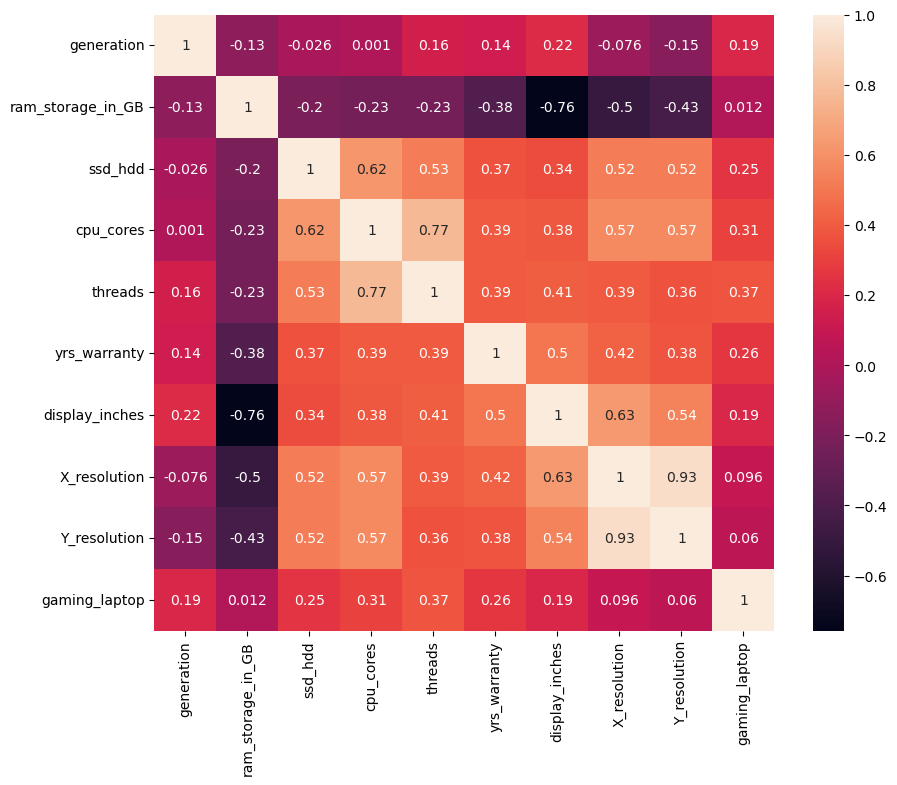

In [18]:
plt.figure(figsize=(10,8))

num_df = laptops.select_dtypes(include=[np.number])   # all int + float
sns.heatmap(
    num_df.drop(columns=['price','rating'], errors='ignore').corr(),
    annot=True,
)
plt.show()

In [19]:
# strong correlation b/w X , Y resolution

laptops['ppi'] = np.where(
    laptops['display_inches'] == 0,
    0,
    np.sqrt(laptops['X_resolution']**2 + laptops['Y_resolution']**2) / laptops['display_inches']
)

laptops.head()

,price,rating,cpu_model,generation,perform_tier,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty,op_sys,display_inches,X_resolution,Y_resolution,brand,model_name,gaming_laptop,Gpu,ppi
0,60490,70.0,AMD Ryzen 5,8,Mid,16,DDR5,512,6,12,1,Windows 11 OS,15.6,1920,1080,HP,Victus,1,4 GB NVIDIA GeForce RTX 2050,141.211995
1,33470,61.0,AMD Ryzen 5,7,Mid,16,DDR5,512,4,8,1,Windows 11 OS,15.6,1920,1080,Lenovo,V15,0,Other Amd,141.211995
2,76890,66.0,Intel Core i7,12,Mid,12,DDR5,512,14,20,1,Windows 11 OS,15.6,1920,1080,Lenovo,Loq,1,6 GB NVIDIA GeForce RTX 4050,141.211995
3,34990,54.0,Intel Core i3,13,Low,8,LPDDR4X,512,6,8,1,Windows 11 OS,15.6,1920,1080,Samsung,Galaxy,0,Intel Graphics,141.211995
4,22990,54.0,Intel Core i3,11,Low,8,DDR4,512,0,4,1,Windows 11 OS,14.0,1920,1080,Acer,Others,0,Other Intel,157.350512


In [20]:
laptops.drop(columns=['display_inches','X_resolution','Y_resolution'],inplace=True)
laptops.head()

,price,rating,cpu_model,generation,perform_tier,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty,op_sys,brand,model_name,gaming_laptop,Gpu,ppi
0,60490,70.0,AMD Ryzen 5,8,Mid,16,DDR5,512,6,12,1,Windows 11 OS,HP,Victus,1,4 GB NVIDIA GeForce RTX 2050,141.211995
1,33470,61.0,AMD Ryzen 5,7,Mid,16,DDR5,512,4,8,1,Windows 11 OS,Lenovo,V15,0,Other Amd,141.211995
2,76890,66.0,Intel Core i7,12,Mid,12,DDR5,512,14,20,1,Windows 11 OS,Lenovo,Loq,1,6 GB NVIDIA GeForce RTX 4050,141.211995
3,34990,54.0,Intel Core i3,13,Low,8,LPDDR4X,512,6,8,1,Windows 11 OS,Samsung,Galaxy,0,Intel Graphics,141.211995
4,22990,54.0,Intel Core i3,11,Low,8,DDR4,512,0,4,1,Windows 11 OS,Acer,Others,0,Other Intel,157.350512


In [21]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1711 non-null   int32  
 1   rating             1696 non-null   float64
 2   cpu_model          1711 non-null   object 
 3   generation         1711 non-null   int32  
 4   perform_tier       1711 non-null   object 
 5   ram_storage_in_GB  1711 non-null   int32  
 6   ram_type           1711 non-null   object 
 7   ssd_hdd            1711 non-null   int32  
 8   cpu_cores          1711 non-null   int32  
 9   threads            1711 non-null   int32  
 10  yrs_warranty       1711 non-null   int32  
 11  op_sys             1711 non-null   object 
 12  brand              1711 non-null   object 
 13  model_name         1711 non-null   object 
 14  gaming_laptop      1711 non-null   int32  
 15  Gpu                1711 non-null   object 
 16  ppi                1711 

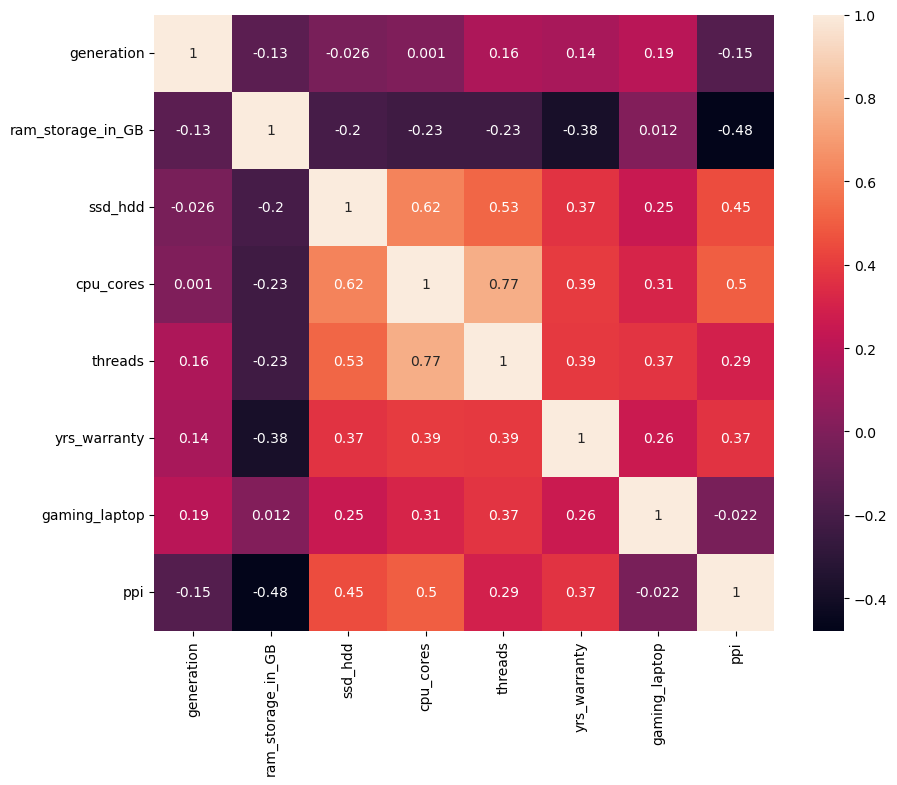

In [22]:
plt.figure(figsize=(10,8))

num_df = laptops.select_dtypes(include=[np.number])   # all int + float
sns.heatmap(
    num_df.drop(columns=['price','rating'], errors='ignore').corr(),
    annot=True,
)
plt.show()

In [23]:
# exporting the dataset

In [24]:
#file_name='laptops_cleaned'
#laptops.to_csv(file_name + ".csv", index=False)

MODEL BUILDING

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [26]:
laptopsc=pd.read_csv('laptops_cleaned.csv')
laptopsc.head()

,price,rating,cpu_model,generation,perform_tier,ram_storage_in_GB,ram_type,ssd_hdd,cpu_cores,threads,yrs_warranty,op_sys,brand,model_name,gaming_laptop,Gpu,ppi
0,60490,70.0,AMD Ryzen 5,8,Mid,16,DDR5,512,6,12,1,Windows 11 OS,HP,Victus,1,4 GB NVIDIA GeForce RTX 2050,141.211995
1,33470,61.0,AMD Ryzen 5,7,Mid,16,DDR5,512,4,8,1,Windows 11 OS,Lenovo,V15,0,Other Amd,141.211995
2,76890,66.0,Intel Core i7,12,Mid,12,DDR5,512,14,20,1,Windows 11 OS,Lenovo,Loq,1,6 GB NVIDIA GeForce RTX 4050,141.211995
3,34990,54.0,Intel Core i3,13,Low,8,LPDDR4X,512,6,8,1,Windows 11 OS,Samsung,Galaxy,0,Intel Graphics,141.211995
4,22990,54.0,Intel Core i3,11,Low,8,DDR4,512,0,4,1,Windows 11 OS,Acer,Others,0,Other Intel,157.350512


In [27]:
data=laptopsc.copy()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1711 non-null   int64  
 1   rating             1696 non-null   float64
 2   cpu_model          1711 non-null   object 
 3   generation         1711 non-null   int64  
 4   perform_tier       1711 non-null   object 
 5   ram_storage_in_GB  1711 non-null   int64  
 6   ram_type           1711 non-null   object 
 7   ssd_hdd            1711 non-null   int64  
 8   cpu_cores          1711 non-null   int64  
 9   threads            1711 non-null   int64  
 10  yrs_warranty       1711 non-null   int64  
 11  op_sys             1711 non-null   object 
 12  brand              1711 non-null   object 
 13  model_name         1711 non-null   object 
 14  gaming_laptop      1711 non-null   int64  
 15  Gpu                1711 non-null   object 
 16  ppi                1711 

In [29]:
# defining X and Y

X = data.drop(columns=['price'])
Y =data['price']

# performing a train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [30]:
# filling the missing values after doing train test split
X_train.fillna(X_train['rating'].mean(),inplace=True)
X_test.fillna(X_test['rating'].mean(),inplace=True)

In [31]:
# Linear Regression
#taking care of categorical cols using one hot encoding by applying a column transformer
categorical_cols=['cpu_model','perform_tier','ram_type','op_sys','brand','model_name','Gpu']

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))
print('MSE',mean_squared_error(Y_test,Y_pred))
print('RMSE',np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 score 0.8058765671120582
MAE 20657.75124400694
MSE 1220637832.8859088
RMSE 34937.627751264234


In [32]:
# Regression analysis

In [33]:
# Regression analysis to see what all columns are imp and can we truly do a linear regression

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

anova_results = {}

for col in categorical_cols:
    model = ols(f'price ~ C({col})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]   # ✅ fixed
    anova_results[col] = p_value

# Convert to DataFrame for readability
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p-value'])
anova_df.sort_values(by='p-value', inplace=True)

print("ANOVA results for categorical columns:\n")
print(anova_df)

ANOVA results for categorical columns:

                    p-value
cpu_model      0.000000e+00
Gpu           2.928096e-210
perform_tier  7.385631e-118
ram_type       8.728790e-93
model_name     4.400690e-91
brand          4.509099e-34
op_sys         2.024337e-15


In [34]:
# result- all category cols are imp

In [35]:
# numerical cols

In [36]:
import statsmodels.api as sm

X_num = X_train.select_dtypes(include=['int64', 'float64'])
X_num= sm.add_constant(X_num)
model = sm.OLS(Y_train, X_num).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     553.4
Date:                Sat, 30 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:49:11   Log-Likelihood:                -17227.
No. Observations:                1454   AIC:                         3.447e+04
Df Residuals:                    1444   BIC:                         3.453e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.429e+05   6820.36

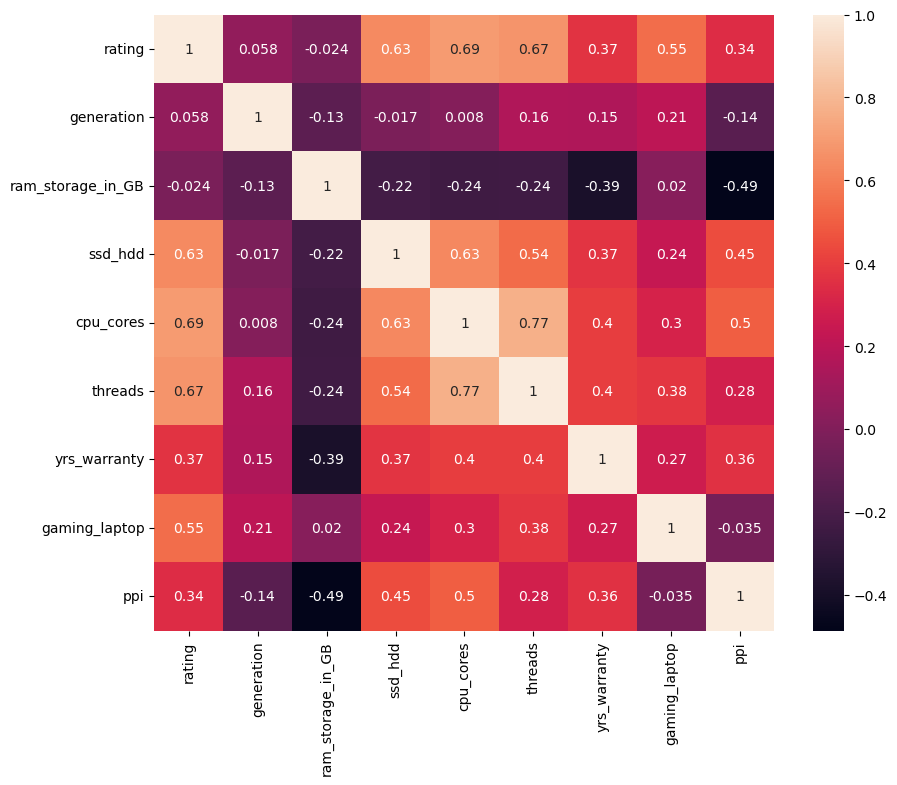

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.select_dtypes(include=['int64', 'float64']).corr(),annot=True)
plt.show()

In [38]:
# have to drop one of cpu_cores or threads as strong collinearity
#dropping threads

In [39]:
# defining X and Y

X = data.drop(columns=['price','threads'])
Y =data['price']

# performing a train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=2)

# filling the missing values after doing train test split
X_train['rating'] = X_train['rating'].fillna(X_train['rating'].mean())
X_test['rating'] = X_test['rating'].fillna(X_test['rating'].mean())  


#taking care of categorical cols using one hot encoding by applying a column transformer
categorical_cols=['cpu_model','perform_tier','ram_type','op_sys','brand','model_name','Gpu']

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))
print('MSE',mean_squared_error(Y_test,Y_pred))
print('RMSE',np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 score 0.8183253338925975
MAE 19559.628600745003
MSE 1079347630.8846326
RMSE 32853.42647098827


In [40]:
# defining X and Y as log(price)

X = data.drop(columns=['price','threads'])
Y =np.log(data['price'])

# performing a train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=3)

# filling the missing values after doing train test split
X_train['rating'] = X_train['rating'].fillna(X_train['rating'].mean())
X_test['rating'] = X_test['rating'].fillna(X_test['rating'].mean())  


#taking care of categorical cols using one hot encoding by applying a column transformer
categorical_cols=['cpu_model','perform_tier','ram_type','op_sys','brand','model_name','Gpu']

transformer = ColumnTransformer(transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])

pipe.fit(X_train,Y_train)
Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))
print('MSE',mean_squared_error(Y_test,Y_pred))
print('RMSE',np.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 score 0.8998029967696476
MAE 0.14903517669538824
MSE 0.04366368183626075
RMSE 0.20895856487892703


In [41]:
# log(price) improves R2 so from here on we would be taking the Y in log
# with change in random state, this R2 score changes so will use Cross validation

In [42]:
# Using Cross Validation in Linear Regression to find the mean R2 score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings("ignore", message="Found unknown categories")


X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])

categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']
transformer = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols), 
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)],remainder='passthrough')  
step2 = LinearRegression()

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])


kfold= KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(pipe, X, Y, cv=kfold, scoring='r2')

print('R2 score for each fold =',scores)
print("Mean R2 score:", scores.mean())

R2 score for each fold = [0.8655562  0.87109142 0.90359734 0.89180429 0.90524278 0.90356168
 0.8834392  0.90569848 0.92757314 0.85672177]
Mean R2 score: 0.8914286284981536


In [43]:
# Ridge regression
# Using grid search cross validation technique(gcv) to find best alpha
# finally,using K fold cross validation to find mean R2 score



In [44]:

# using gcv to find alpha

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols), 
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)
], remainder='passthrough')  
step2 = Ridge()
pipe_ridge = Pipeline([
    ('step1', transformer),
    ('step2', step2)
])

param_grid = {'step2__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

gcv_ridge = GridSearchCV(pipe_ridge, param_grid, cv=5, scoring='r2', verbose=1)
gcv_ridge.fit(X_train, Y_train)

best_alpha = gcv_ridge.best_params_['step2__alpha'] # best alpha value
best_score = gcv_ridge.best_score_

print('Best alpha:', best_alpha)

#using best found alpha in ridge regression

X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])

categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']
transformer = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols), 
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)],remainder='passthrough')  
step2 = Ridge(alpha=best_alpha)

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])


kfold= KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(pipe, X, Y, cv=kfold, scoring='r2')

print('R2 score for each fold =',scores)
print("Mean R2 score:", scores.mean())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best alpha: 1
R2 score for each fold = [0.86731444 0.86952438 0.90571282 0.88510055 0.9055022  0.90793793
 0.88397448 0.90522569 0.92866431 0.8650729 ]
Mean R2 score: 0.8924029700482354


In [45]:
# Lasso regression
# Using grid search cross validation technique(gcv) to find best alpha
# finally,using K fold cross validation to find mean R2 score

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols), 
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)
], remainder='passthrough')  
step2 = Lasso()
pipe_lasso = Pipeline([
    ('step1', transformer),
    ('step2', step2)
])

param_grid = {'step2__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

gcv_lasso = GridSearchCV(pipe_lasso, param_grid, cv=5, scoring='r2', verbose=1)
gcv_lasso.fit(X_train, Y_train)

best_alpha = gcv_lasso.best_params_['step2__alpha']
best_score = gcv_lasso.best_score_

print('Best alpha:', best_alpha)

# using k fold cross validation for best found alpha 

X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])

categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']
transformer = ColumnTransformer([('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols), 
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)],remainder='passthrough')  
step2 = Lasso(alpha=best_alpha)

pipe = Pipeline([
    ('step1',transformer),
    ('step2',step2)
])

kfold= KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(pipe, X, Y, cv=kfold, scoring='r2')

print('R2 score for each fold =',scores)
print("Mean R2 score:", scores.mean())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best alpha: 0.0001
R2 score for each fold = [0.86628377 0.86923131 0.90282951 0.88495545 0.90638167 0.90838733
 0.88356778 0.90640127 0.92887388 0.86278366]
Mean R2 score: 0.891969565005487


In [47]:
# using Ridge for the time being to make some predictions

In [48]:

X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])
categorical_cols = ['cpu_model', 'perform_tier', 'ram_type', 'op_sys', 'brand', 'model_name', 'Gpu']
columns_to_impute = ['rating']
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols),
    ('imputer', SimpleImputer(strategy='mean'), columns_to_impute)
], remainder='passthrough')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Ridge Regression Pipeline
pipe = Pipeline([
    ('step1', transformer),
    ('ridge', Ridge(alpha=1.0)) 
])

# model fitting
pipe.fit(X_train, Y_train)

# Predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# R² scores
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

print("Training R² Score:", r2_train)
print("Testing R² Score:", r2_test)

Training R² Score: 0.9186806927085569
Testing R² Score: 0.8637077315392186


In [49]:
# some predictions


new_data = pd.DataFrame([
    {
        'rating': 4.5,
        'cpu_model': 'Intel i7',
        'generation': 12,
        'perform_tier': 'High',
        'ram_storage_in_GB': 16,
        'ram_type': 'DDR5',
        'ssd_hdd': 512,        
        'cpu_cores': 8,
        'yrs_warranty': 1,
        'op_sys': 'Windows',
        'brand': 'Dell',
        'model_name': 'XPS',
        'gaming_laptop': 0,
        'Gpu': 'NVIDIA',
        'ppi': 220.5
    }
])


predictions = pipe.predict(new_data)
actualpred=np.exp(predictions)

print(actualpred)


[29853.07735577]


In [50]:
# using ANN now

In [51]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Split
X = data.drop(columns=['price','threads'])
Y = np.log(data['price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3)

X_train['rating'] = X_train['rating'].fillna(X_train['rating'].mean())
X_test['rating'] = X_test['rating'].fillna(X_test['rating'].mean())  
categorical_cols = ['cpu_model','perform_tier','ram_type','op_sys','brand','model_name','Gpu']

transformer = ColumnTransformer(
    transformers=[('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough')

X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# scaling after transformation for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)



In [53]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [54]:
# defining the ann model

model = Sequential(name="LaptopPricePredictor")

model.add(Input(shape=(106,)))
model.add(Dropout(0.1))


model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(32,activation='linear'))
model.add(Dense(1, activation='linear'))

model.summary()


Model: "LaptopPricePredictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 106)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          54,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,673 (799.50 KB)

 Trainable params: 204,673 (799.50 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae', 'mse'])

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(X_train_scaled, Y_train,epochs=1000,validation_split=0.2,batch_size=48,verbose=1,callbacks=callback)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 25.9598 - mae: 3.8749 - mse: 25.9598 - val_loss: 0.7475 - val_mae: 0.7347 - val_mse: 0.7475
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.0130 - mae: 0.8517 - mse: 1.0130 - val_loss: 0.4261 - val_mae: 0.5127 - val_mse: 0.4261
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4533 - mae: 0.5148 - mse: 0.4533 - val_loss: 0.4293 - val_mae: 0.5054 - val_mse: 0.4293
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4145 - mae: 0.4988 - mse: 0.4145 - val_loss: 0.4239 - val_mae: 0.5099 - val_mse: 0.4239
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4135 - mae: 0.4922 - mse: 0.4135 - val_loss: 0.4232 - val_mae: 0.5048 - val_mse: 0.4232
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4116 - mae: 0.4923 - mse: 0.4116 - val_loss: 0.4213 - val_mae: 0.5042 - val_mse: 0.4213
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4079 - mae: 0.4915 - mse: 0.4

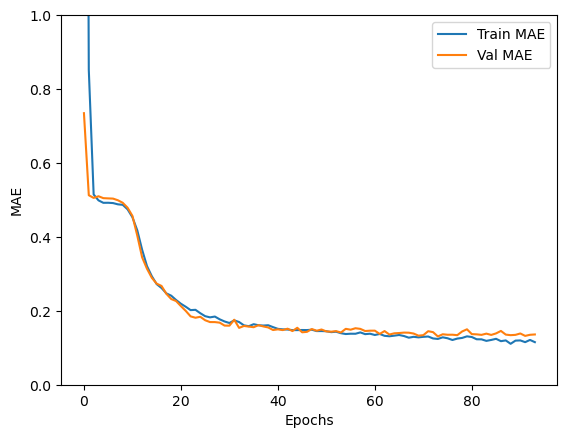

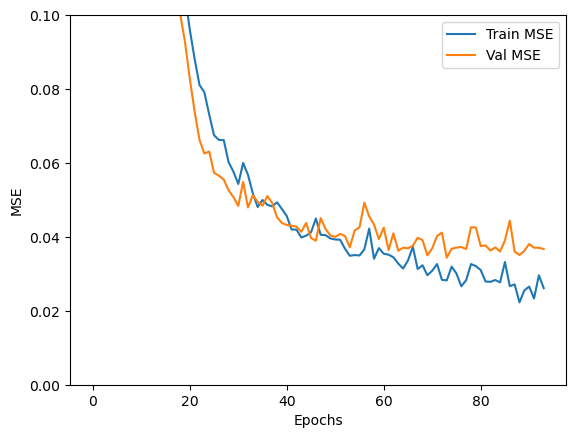

In [56]:
# Plotting MAE
plt.figure()
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plotting MSE
plt.figure()
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 0.1)
plt.legend()
plt.show()


In [57]:
# Training R2 score
y_train_pred = np.exp(model.predict(X_train_scaled))
y_train_true = np.exp(Y_train).values
r2_train = r2_score(y_train_true, y_train_pred)

# Testing R2 score
y_test_pred = np.exp(model.predict(X_test_scaled))
y_test_true = np.exp(Y_test).values
r2_test = r2_score(y_test_true, y_test_pred)

print("Training R²:", r2_train)
print("Testing R²:", r2_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training R²: 0.9206310293874017
Testing R²: 0.8658243259921921
